## Data Project: Alcohol consumption and life expectancy in 2016 
Introduction: The primary objective of this research is to execute proficient application, cleaning, and testing of diverse data structuring methodologies. This is accomplished by utilizing data analysis techniques, as inferred from the course Descriptive Economics.

Data Acquisition and Preprocessing: The data sets utilized in this study have been gathered from the comprehensive resource 'Our World in Data' (https://ourworldindata.org/). Specifically, two datasets have been employed for this analysis: "Share of adults who drank alcohol in last year, 2016" and "Life Expectancy of Women vs. Men". These datasets undergo thorough cleaning and preprocessing procedures to ensure data reliability and validity for subsequent analysis.

In [178]:
# setting up the enviroment

%load_ext autoreload
%autoreload 2

# Importing modules and packages

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


import os 
# Using assert to check that paths is downloaded on computer.
assert os.path.isdir('data/')
assert os.path.isfile('data/lifeexp.xlsx')
assert os.path.isfile('data/alconsp.xlsx')

# Print everything in data
os.listdir('data/')


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


['alconsp.xlsx', 'lifeexp.xlsx']

In [179]:
# Reading in lifeexp.xlsx from our world in data
lifeexp = pd.read_excel('data/lifeexp.xlsx')
(lifeexp).head() # Showing the first 5 rows of the data

,Entity,Code,Year,Life expectancy - Sex: female - Age: at birth - Variant: estimates,Life expectancy - Sex: male - Age: at birth - Variant: estimates,Population,Continent
0,Afghanistan,AFG,2016,65.1,61.2,34636212.0,NaN
1,Albania,ALB,2016,81.4,76.6,2881064.0,NaN
2,Algeria,DZA,2016,76.8,74.7,40339330.0,NaN
3,American Samoa,ASM,2016,75.0,70.0,50468.0,NaN
4,Andorra,AND,2016,85.4,80.7,72563.0,NaN


In [180]:
#dropping columns
lifeexp.drop(['Continent', 'Code'], axis=1, inplace=True)

# renaming the columns using columns dictionary
columns_dict={}
columns_dict['Entity'] = 'Country'
columns_dict['ratio'] = 'FM_ratio'
columns_dict['Population (historical estimates)'] = 'Population'
columns_dict['Life expectancy - Sex: female - Age: at birth - Variant: estimates']= 'Female_le'
columns_dict['Life expectancy - Sex: male - Age: at birth - Variant: estimates'] = 'Male_le'
lifeexp.rename(columns=columns_dict,inplace=True)

# dropping the NaN values
lifeexp = lifeexp.dropna(subset=['Female_le', 'Male_le'])

#dropping the UN regions and the World
lifeexp = lifeexp[~lifeexp['Country'].str.contains('UN') & (lifeexp['Country'] != 'World') 
                  & ~lifeexp['Country'].str.contains('countries')& ~lifeexp['Country'].str.contains('Countries')
                  & ~lifeexp['Country'].str.contains('income')]

#dropping Year in the statistics summary
lifeexp['Year'] = lifeexp['Year'].astype(str).str.split('.').str[0]

#calculating female male life expectancy ratio
lifeexp['FM_le_ratio'] = lifeexp['Female_le']/lifeexp['Male_le']

print(lifeexp.head(5))
lifeexp.describe()

          Country  Year  Female_le  Male_le  Population   FM_le_ratio
0     Afghanistan  2016       65.1     61.2   34636212.0     1.063725
1         Albania  2016       81.4     76.6    2881064.0     1.062663
2         Algeria  2016       76.8     74.7   40339330.0     1.028112
3  American Samoa  2016       75.0     70.0      50468.0     1.071429
4         Andorra  2016       85.4     80.7      72563.0     1.058240


,Female_le,Male_le,Population,FM_le_ratio
count,235.000000,235.000000,2.340000e+02,235.000000
mean,75.489362,70.254043,3.210134e+07,1.075077
std,7.920493,7.544326,1.315723e+08,0.029047
min,52.200000,49.600000,1.447000e+03,1.007722
25%,70.050000,65.100000,4.048960e+05,1.053715
50%,77.800000,71.100000,5.333898e+06,1.072197
75%,81.400000,76.300000,1.966724e+07,1.091913
max,88.200000,83.500000,1.401890e+09,1.159226


**Female_le** (*Mean: 75.49, Std: 7.92, Min: 52.2, Max: 88.2*): The average life expectancy for females across all contris is approximately 75.49 years. The range of this data is from 52.2 to 88.2 years, indicating significant differences in female life expectancy across different regions. The standard deviation of 7.92 years also suggests a substantial level of variation in female life expectancy.

**Male_le** (*Mean: 70.25, Std: 7.54, Min: 49.6, Max: 83.5*): The average life expectancy for males is around 70.25 years, which is lower than that of females. The range is from 49.6 to 83.5 years, and the standard deviation is 7.54 years, indicating that male life expectancy also varies considerably across different contries.

**Population** (*Mean: 32.10 million, Std: 131.57 million, Min: 1447, Max: 1.40 billion*): The average population size in these locations is 32.10 million people, but there's a large standard deviation of 131.57 million, indicating significant variation in population size. The minimum population size is 1447 and the maximum is 1.40 billion. The minimum population size seems to be quite small, and it might be interesting to identify which region this refers to.

**FM_le_ratio** (*Mean: 1.07, Std: 0.03, Min: 1.00, Max: 1.16*): On average, the life expectancy of females is approximately 1.07 times the life expectancy of males across all locations. The range of this ratio is from 1.00 to 1.16, which shows that females generally live longer than males in all of the countries represented in this data. The standard deviation of 0.03 indicates that this ratio does not vary significantly across different locations.

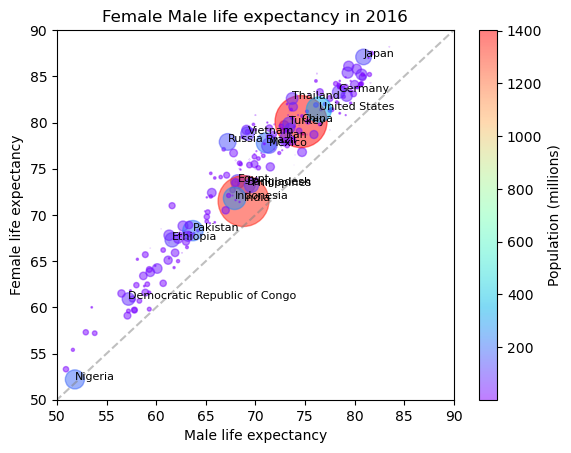

<Figure size 1600x1500 with 0 Axes>

In [181]:
# Sort the data by population in descending order
sorted_data = lifeexp.sort_values('Population ', ascending=False)

# Get the top 20 countries by population
top_20_countries = sorted_data.head(20)

#extracting population data from the dataset
pop = lifeexp['Population ']  

# Storing pop as a numpy array: np_pop
np.array(pop)
# Format population numbers to display in millions
np_pop1 = np.array(pop) / 1_000_000 
pop_labels = [f'{pop:.2f} million' for pop in np_pop1]

#Create scatter plot
plt.scatter(lifeexp['Male_le'], lifeexp['Female_le'], s= np_pop1,  alpha=0.5, c= np_pop1, cmap = 'rainbow')

# set the x and y-axis limits
plt.xlim(50, 90)
plt.ylim(50, 90)

# Add axis labels
plt.xlabel('Male life expectancy')
plt.ylabel('Female life expectancy')

# Add colorbar legend
plt.colorbar(label='Population (millions)')

# Add title
plt.title('Female Male life expectancy in 2016')

# Add 45 degree line
plt.plot([0, 100], [0, 100], linestyle='--', color='grey', alpha =0.5)

# Add country labels
for i, row in top_20_countries.iterrows():
    plt.annotate(row['Country'], (row['Male_le'], row['Female_le']), fontsize=8)

# Adjust plot size for better visibility of labels
plt.figure(figsize=(16, 15))
plt.show()

In this scatterplot, the x-axis represents the male life expectancy, while the y-axis represents the female life expectancy. The size of the bubbles represents the population, with each unit on the population axis corresponding to 1 million people. Notably, two large red bubbles representing China and India are visible in the scatterplot. Additionally, only the 10 countries with the largest populations are labeled for clarity. Observing the data, we can see that all the bubbles lie above the 45-degree line, indicating that female life expectancy is higher than male life expectancy in all countries in the year 2016.

In [182]:
# Reading in second excelfile from Our world in data with alchohol consumption 
alconsp = pd.read_excel('data/alconsp.xlsx')
alconsp.head(5)

,Entity,Code,Year,"Indicator:Alcohol, consumers past 12 months (%) - Sex:Male","Indicator:Alcohol, consumers past 12 months (%) - Sex:Female",Population (historical estimates),Continent
0,Afghanistan,AFG,2016,1.0,0.3,34636212,NaN
1,Albania,ALB,2016,65.0,37.6,2881064,NaN
2,Algeria,DZA,2016,4.8,1.5,40339328,NaN
3,American Samoa,ASM,2016,NaN,NaN,50468,NaN
4,Andorra,AND,2016,85.2,64.3,72563,NaN


In [183]:
# Creating and renaming columns in dataset in a dictionary
columns_dict={}
columns_dict['Entity'] = 'Country'
columns_dict['Indicator:Alcohol, consumers past 12 months (%) - Sex:Male'] = 'Male_alc'
columns_dict['Indicator:Alcohol, consumers past 12 months (%) - Sex:Female']= 'Female_alc'
columns_dict['Population (historical estimates)'] = 'Population'
alconsp.rename(columns=columns_dict,inplace=True)

#dropping columns continent and code
alconsp.drop(['Continent','Code'],axis=1,inplace=True)

# dropping the NaN values
alconsp = alconsp.dropna(subset=['Female_alc', 'Male_alc'])

#calculating female male alcohol consumption ratio
alconsp['FM_alc_ratio'] = alconsp['Female_alc']/alconsp['Male_alc']

alconsp.head(10)

,Country,Year,Male_alc,Female_alc,Population,FM_alc_ratio
0,Afghanistan,2016,1.0,0.3,34636212,0.300000
1,Albania,2016,65.0,37.6,2881064,0.578462
2,Algeria,2016,4.8,1.5,40339328,0.312500
4,Andorra,2016,85.2,64.3,72563,0.754695
5,Angola,2016,61.6,34.3,29154742,0.556818
7,Antigua and Barbuda,2016,63.9,36.5,90575,0.571205
8,Argentina,2016,79.9,55.7,43668236,0.697121
9,Armenia,2016,38.0,16.2,2865841,0.426316
11,Australia,2016,88.3,70.6,24195706,0.799547
12,Austria,2016,87.7,68.9,8736491,0.785633


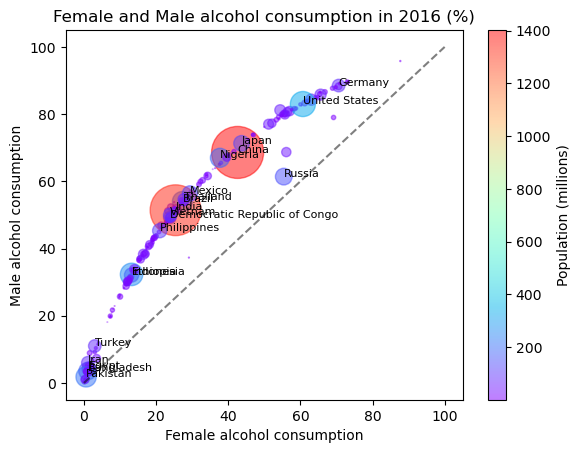

<Figure size 1600x1500 with 0 Axes>

In [184]:
#extracting population data from the dataset
Pop = alconsp.Population

# Storing pop as a numpy array: np_pop
np.array(Pop)
# Format population numbers to display in millions
np_pop = np.array(Pop) / 1_000_000
pop_labels = [f'{Pop:.2f} million' for Pop in np_pop]
#Create scatter plot
plt.scatter(alconsp['Female_alc'], alconsp['Male_alc'], s= np_pop,  alpha=0.5, c= np_pop, cmap = 'rainbow')

# Add axis labels
plt.xlabel('Female alcohol consumption')
plt.ylabel('Male alcohol consumption')
# Add colorbar legend
plt.colorbar(label='Population (millions)')

# Add title
plt.title('Female and Male alcohol consumption in 2016 (%)')

# Add 45 degree line
plt.plot([0, 100], [0, 100], linestyle='--', color='black', alpha =0.5)

# Add country labels for the top 20 largest populations
top_countries = alconsp.nlargest(20, 'Population')
for i, row in top_countries.iterrows():
    plt.annotate(row['Country'], (row['Female_alc'], row['Male_alc']), fontsize=8)


# After customizing, display the plot
plt.figure(figsize=(16, 15))
plt.show()

Here we can see that the alcohol consumtion for males are higher than females in all included countries. The bubble chart represents female alcohol consumption on the x-axis and male alcohol consumption on the y-axis. The size and color of the bubbles indicates the population size of each country. In general, the curve seems to be very smooth with only few 'outliers' (e.g. Russia that has a more even alcohol consumption between men and women)

In [185]:
#Descriptive statistics
statistics = alconsp.describe()

# Convert population values to millions
statistics['Population'] = statistics['Population'] / 1_000_000

# Format the population column with millions and commas as thousands separators
statistics['Population'] = statistics['Population'].apply(lambda x: '{:,.2f} million'.format(x))

# Print the formatted descriptive statistics
print(statistics)

         Year    Male_alc  Female_alc        Population  FM_alc_ratio
count   188.0  188.000000  188.000000      0.00 million    188.000000
mean   2016.0   49.442021   29.347872     39.36 million      0.518978
std       0.0   25.739223   21.317873    145.88 million      0.155423
min    2016.0    0.200000    0.100000      0.00 million      0.179775
25%    2016.0   31.400000   12.800000      2.11 million      0.411207
50%    2016.0   49.250000   23.850000      8.73 million      0.483150
75%    2016.0   69.500000   45.900000     28.18 million      0.634180
max    2016.0   95.800000   87.700000  1,401.89 million      0.915449


The data set contains 188 countries after the reduction of different NA variables. The year selected is 2016.

**Male_alc** (*Mean: 49.44, Std: 25.74, Min: 0.2, Max:95.8*). The average 49,44% of males has consumed alcohol in 2016. Libya is the country that has least males that has consumed alcohol and is on 0.2% and the highest is Luxembourg that has a rate of 95.8%. The standard deviation is 25.74%.

**Female_alc** (*Mean: 29.34, Std: 21.31, Min: 0.1, Max: 87.7*) The average percentage of females that has consumed alcohol in 2016 is 29.34%. This is significantly lower than the rate of men. The range of the female data is also larger, which is from 0.1% to 87.7%. which indicates a high standard deviation.

**Population** (*Mean: 39.36 mil, Std: 145.88 mil, Min: 0, Max: 1,401.89 mil*): The average population is 39.36 million people. The standard deviation is 145.88 million, which suggests a great disparity in the population sizes. The Min is 0 population, which is a mistake, since the dataset shows the smallest nation to be Tokelau with a populaiton size of 1447. The maximum population is 1.4 billion, which is China. 

**FM_alc_ratio** (*Mean: 0.51, Std: 0.15, Min: 0.17, Max: 0.91*): The average ratio of female to male alcohol consumption is 0.51, which means every time two male are consuming alcohol only one female is consuming alcohol. This does vary a lot in the different contries, where the lowest ratio is 0.17 and the maximum ratio is 0.91. The standard deviation is 0.15 and suggests a significant variation in the ratios around the world.

In [186]:
# dropping 'Male_alc', 'Female_alc' and 'Population' columns
alconsp.drop(['Male_alc','Female_alc','Population'],axis=1, inplace= True)

# dropping 'Male_le', 'Female_le' and 'Population' columns
lifeexp.drop(['Male_le','Female_le', 'Population '], axis= 1, inplace = True)

# merging 'lifeexp' and 'alconsp'
# the 'inner' join ensures that only the countries present in both DataFrames are included in the result
combined_df = pd.merge(lifeexp,alconsp, on= 'Country', how = 'inner')

# displaying the first 5 rows
combined_df.head(5)

,Country,Year_x,FM_le_ratio,Year_y,FM_alc_ratio
0,Afghanistan,2016,1.063725,2016,0.300000
1,Albania,2016,1.062663,2016,0.578462
2,Algeria,2016,1.028112,2016,0.312500
3,Andorra,2016,1.058240,2016,0.754695
4,Angola,2016,1.080068,2016,0.556818


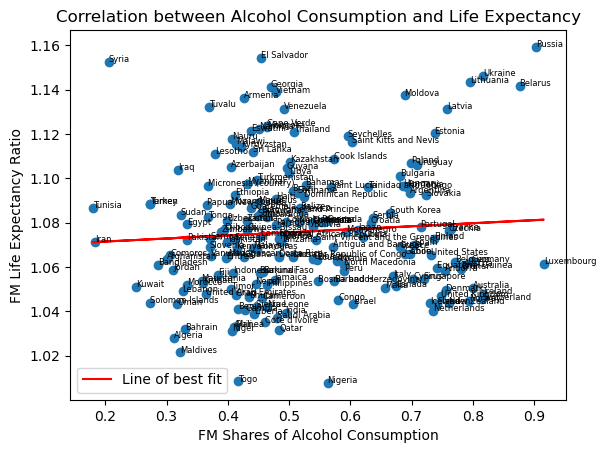

Correlation coefficient is: 0.07245952845879354


In [187]:
combined_df = combined_df.rename(columns={'Year_x': 'Year'})
combined_df.drop('Year_y', axis=1, inplace=True)

# Create scatter plot
plt.scatter(combined_df['FM_alc_ratio'], combined_df['FM_le_ratio'])

# Calculate coefficients of line of best fit
m, b = np.polyfit(combined_df['FM_alc_ratio'], combined_df['FM_le_ratio'], 1)

# Add line of best fit with label for legend
plt.plot(combined_df['FM_alc_ratio'], m * combined_df['FM_alc_ratio'] + b, color='red', label='Line of best fit')

# add axis labels
plt.xlabel('FM Shares of Alcohol Consumption')
plt.ylabel('FM Life Expectancy Ratio')
plt.title('Correlation between Alcohol Consumption and Life Expectancy')

# Add country labels
for i, country in enumerate(combined_df['Country']):
    plt.text(combined_df['FM_alc_ratio'][i], combined_df['FM_le_ratio'][i], country, fontsize=6)

# Display legend
plt.legend()

plt.show()

# Calculate correlation coefficient
correlation = combined_df['FM_alc_ratio'].corr(combined_df['FM_le_ratio'])
print("Correlation coefficient is:", correlation)


**Comparing and correlation**

The correlation coefficient of 0.07245 indicates a very weak positive correlation between "Shares of alcohol consumption Female/Male Ratio" and "Life expectancy Female/Male ratio" in 2016. The value is close to 0, suggesting that there is a very minimal linear relationship between these variables. In practical terms, this correlation coefficient indicates that there is little to no meaningful correlation between the two variables. This might indicate that there more omitted variables, that can have an influence on the life expectancy.

It is important to notice that correlation does not imply causation, and there may be other factors, such as wealth, socioeconomic factors etc., that contributes to life expectancy besides alcohol consumption. Additionally, the data only provides information for the year 2016 and may not be representative of overall trends.
In general we can see that in 2016 the life expectancy of women is longer that men, where men consumes more alcohol than women in all countries.